# Project : The Movie Database (TMDb)

## Table of Contents 

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>
    

# Introduction

<ul>
    <li>Our data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user rating ,budgets ,and revenues . It consists of 21 columns.</li></ul>
    
## There are some questions that we can answer from analysis

    1- Movies Which had most and least profit.
    2- Movies with largest and lowest budget.
    3- Movies with largest and lowest runtime.
    4- Movies which had most and least revenue.
    5- Average run time for movies.
    6- In which year we had most number of profitable movies?
    
### Respecting to the profitable movies (dependent variable)
    
    1- Successful genres.
    2- Most frequent cast.
    3- Average budget and average revenue.
    4- Average duration of the movie.
    

     
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling
- We observed that no unit of currency mentioned in data set , so that we will consider dollar is default currency.

### Gathering Data 

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Assesing Data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.duplicated().sum()

1

## Data Cleaning

 - 1- Remove unimportant columns like ('id', 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj').
 - 2- Remove duplicated rows.
 - 3- Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding.
 - 4- Change release date to date format.
 - 5- Changing format of budget and revenue columns to int64.

#### 1- Remove unimportant columns like ('id', 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj').


In [6]:
deleted_col = ['id', 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'production_companies',
        'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']
df.drop(deleted_col,axis=1,inplace=True)
df.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


#### 2- Remove duplicate rows.

In [7]:
df.shape

(10866, 10)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(10865, 10)

#### 3-  Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding

In [10]:
#create separate list of revenue and budget
zero_list = ['budget','revenue']
#replace all 0 values by NAN in the list 
df[zero_list] = df[zero_list].replace(0,np.NAN)
#Remove all NaN row values in budget and revenue list 
df.dropna(subset =zero_list,inplace = True )

In [11]:
df.shape

(3854, 10)

#### 4- Change release date to date format.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3854 non-null   float64
 1   revenue         3854 non-null   float64
 2   original_title  3854 non-null   object 
 3   cast            3850 non-null   object 
 4   director        3853 non-null   object 
 5   tagline         3574 non-null   object 
 6   runtime         3854 non-null   int64  
 7   genres          3854 non-null   object 
 8   release_date    3854 non-null   object 
 9   release_year    3854 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 331.2+ KB


In [13]:
df.release_date = pd.to_datetime(df['release_date'])
df.dtypes


budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

#### 5- Changing format of budget and revenue columns to int64.

In [14]:
format_list = ['budget','revenue']
df[format_list] = df[format_list].astype('int64')
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

# Expolatory Data Analysis (EDA)

### Calculate the profit of each movie

In [15]:
df['profit_earned'] = df['revenue']-df['budget']
df.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit_earned
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354


### Research Question 1 : Movies which had most and least profit 

In [16]:
# I will create function to facilitate calculation of EDA
def calculate(column):
    #calculate max of profit_earned
    max_ = df[column].idxmax()
    max_profit = pd.DataFrame(df.loc[max_])
    #calculate min of profit_earned
    min_ = df[column].idxmin()
    min_profit = pd.DataFrame(df.loc[min_])
    #Concatenate tow dataframes
    analysis = pd.concat([min_profit,max_profit], axis = 1)
    return analysis

#call function
calculate('profit_earned')

,2244,1386
budget,425000000,237000000
revenue,11087569,2781505847
original_title,The Warrior's Way,Avatar
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Sngmoo Lee,James Cameron
tagline,Assassin. Hero. Legend.,Enter the World of Pandora.
runtime,100,162
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction
release_date,2010-12-02 00:00:00,2009-12-10 00:00:00
release_year,2010,2009


 - From this analysis we observed that columns with id 1386 shows max earned profit with 2544505847,
  and column with id 2244 shows min earned profit with -413912431
 

### Research Question 2 : Movies with largest and lowest budget 

In [17]:
# use "calculate(column)" function do do this analysis
calculate('budget')

,2618,2244
budget,1,425000000
revenue,100,11087569
original_title,Lost & Found,The Warrior's Way
cast,David Spade|Sophie Marceau|Ever Carradine|Step...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Jeff Pollack,Sngmoo Lee
tagline,A comedy about a guy who would do anything to ...,Assassin. Hero. Legend.
runtime,95,100
genres,Comedy|Romance,Adventure|Fantasy|Action|Western|Thriller
release_date,1999-04-23 00:00:00,2010-12-02 00:00:00
release_year,1999,2010


- We observed that column with id 2244 shows largest budget with 425000000 dollar, and column with id 2618 shows lowest budget with 1 dollar

### Research Question 3 : Movie with longest and shortest runtime

In [18]:
# use "calculate(column)" function do do this analysis
calculate('runtime')

,5162,2107
budget,10,18000000
revenue,5,871279
original_title,Kid's Story,Carlos
cast,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director,Shinichiro Watanabe,Olivier Assayas
tagline,NaN,The man who hijacked the world
runtime,15,338
genres,Science Fiction|Animation,Crime|Drama|Thriller|History
release_date,2003-06-02 00:00:00,2010-05-19 00:00:00
release_year,2003,2010


- We observed that column with id 5162 shows the shortest runtime with 15 mins, and column with id 2107 shows the longest runtime with 338 mins

### Research Question 4 : Movies with most and least revenue

In [19]:
# use "calculate(column)" function do do this analysis
calculate('revenue')

,5067,1386
budget,6000000,237000000
revenue,2,2781505847
original_title,Shattered Glass,Avatar
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Billy Ray,James Cameron
tagline,NaN,Enter the World of Pandora.
runtime,94,162
genres,Drama|History,Action|Adventure|Fantasy|Science Fiction
release_date,2003-11-14 00:00:00,2009-12-10 00:00:00
release_year,2003,2009


- We observed that column with id 5067 shows the smallest earned revenue with 2 dollar , and column with id 1386 shows the largest earned revenue with 2781505847 dollar

### Research Question 5 : Average runtime for movies 

In [20]:
df.runtime.mean()

109.22029060716139

#### Average runtime for all movies 109 mins , so that let's visualize it 

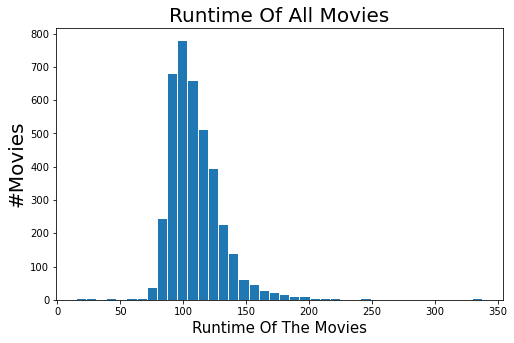

In [21]:
plt.figure(figsize = (8,5))
plt.hist(df['runtime'],rwidth = 0.9,bins = 40)
plt.xlabel('Runtime Of The Movies', fontsize=15)
plt.ylabel('#Movies', fontsize=20)
plt.title('Runtime Of All Movies', fontsize = 20 );


In [22]:
df.runtime.describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

##### From the Plot we observed that most movies timed between 80 to 115 mins , it is about 800 movies fall in this criteria.
##### From the plot and calculations we cand conclude that : 
-  1- 25% of movies have runtime less than 95 mins.
-  2- 50% of movies have runtime less than 109 mins.
-  3- 75% of movies have runtime less than 338 mins

### Research Question 6 :  In which year we had most number of profitable movies?

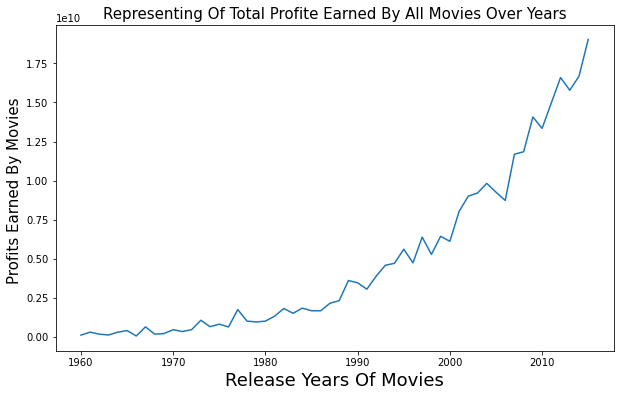

In [23]:
profits_over_years = df.groupby('release_year')['profit_earned'].sum()
plt.figure(figsize=(10,6))
plt.plot(profits_over_years)
plt.xlabel('Release Years Of Movies',fontsize = 18)
plt.ylabel('Profits Earned By Movies ' , fontsize = 15)
plt.title('Representing Of Total Profite Earned By All Movies Over Years', fontsize = 15);


In [24]:
#to find the year of highest profit
profits_over_years.idxmax()

2015

##### So That we observed form plot and calculation that the year 2015 was the year where movies made the highest profit .


### Now we will analyze our data respect to the profits 
 - to analyze profitable movies we will take movies that accomplish ocer 50000000

In [25]:
profit_data = df[df['profit_earned']>=50000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index+1
profit_data.tail()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit_earned
1334,20000000,187884007,Jaws 2,Roy Scheider|Lorraine Gary|Murray Hamilton|Jos...,Jeannot Szwarc,Just when you thought it was safe to go back i...,116,Horror|Thriller,1978-06-16,1978,167884007
1335,650000,55000000,Dawn of the Dead,David Emge|Ken Foree|Scott H. Reiniger|Gaylen ...,George A. Romero,"When there's no more room in hell, the dead wi...",127,Horror,1978-09-02,1978,54350000
1336,55000000,300218018,Superman,Marlon Brando|Gene Hackman|Christopher Reeve|N...,Richard Donner,You'll Believe a Man Can Fly!,143,Adventure|Fantasy|Action|Science Fiction,1978-12-14,1978,245218018
1337,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,The Night HE Came Home!,91,Horror|Thriller,1978-10-25,1978,69700000
1338,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,It was the Deltas against the rules... the rul...,109,Comedy,1978-07-27,1978,138300000


### Research Question 7 : Successful Genres

In [26]:

#function which will take any column as argument from and keep its track 
def data(column):
    data = profit_data[column].str.cat(sep='|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

genre = data('genres')
genre.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

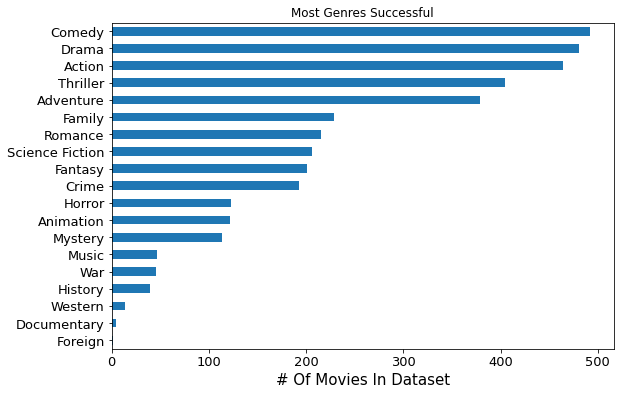

In [27]:
genre.sort_values(ascending = True,inplace =True)
x = genre.plot.barh(fontsize=13)
x.set(title = 'Most Genres Successful')
x.set_xlabel('# Of Movies In Dataset', fontsize=15)
x.figure.set_size_inches(9,6)

- From calculations and previous plot we observed that comedy is the most successful genre of movies with 492 movie followed by Drama with 481 movies and action with 464

### Research Question 7 : Most Frequent Cast

In [32]:
casts = data('cast')
casts.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

- From our analysis we observed that Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 cast and Tom Hanks with 22 cast.

### Research Question 8 :  Average budget and average revenue

In [33]:
profit_data['budget'].mean()

60444957.76083707

In [34]:
profit_data['revenue'].mean()

254957662.59491777

- We Observed that movies which have profit 50 million dollar and more , have average budget of 60 million dolla and average revenue of 255 million dollar

### Research Question 9 :  Average duration of the movie

In [35]:
profit_data['runtime'].mean()

113.66741405082212

- We Observed that average duration of movies that have profit 50 million dollar and more is 114 mins

# Conclusion

 ##### This was a very interesting data analysis . We came out with some impacted facts about movies .
 
 ### For a successful movie it should be follow the following :
 
 1- Genres must be : Comedy, Drama, Action, Thriller, Adventure.
 
 2- Any Of those actors should be in the cast : Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Cameron Diaz.
 
 3- Average budget must be around 60 million dollar.
 
 4- Average duration of the movie must be 114 mins.
 
## Limitation

  1- we have used TMDb movies data set for our analysis and using popularity ,revenue and budget . We not confident that data set which we provided is up to date or all data is completly correct.
  
  2- There is no currency conversion is considered during this analysis , and our analysis is limited on numerical values of revenue and budget.
  
  3- Dropping missing or null values from variables may skew our analysis and show unintentional bias towards the relationship being analyzed.